In [10]:
# Import librarires
import pandas as pd
import numpy as np
import os
#import seaborn as sns; sns.set(style="white", color_codes=True, rc={'figure.figsize':(20,15)})
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Create anndata and scanpy
import anndata as ad
import scanpy as sc
import scanpy.external as sce

sc.set_figure_params(scanpy=True, dpi=180, dpi_save=1600, frameon=True, vector_friendly=True, color_map=None, format='pdf', transparent=True, ipython_format='png2x')

## ALCL ALK+

In [2]:
# HMS
WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma/cell_type_calling/ALCL_ALK"
os.chdir(WD)

data = pd.read_csv('ALCL_EXP.csv', delimiter=',', index_col=0)
meta = pd.read_csv('ALCL_META.csv', delimiter=',',index_col=0)

In [6]:
# Remove a few genes from the dataset
keep = ["Ki67","CD20","CD8","CD206","CD30","CD163","S6P","CD7","CD5","CD3D","CD16","CD68"]
data = data.loc[:,keep]

In [8]:
#Normalize data
# Calculate total count for each cell
sum_data = data.sum(axis=1)
# Divide genes by total count for every cell
data_new = data.div(sum_data, axis=0)
# Calculate median count of the entire dataset
import itertools
from numpy import median
med = median(list(itertools.chain(*data.values.tolist())))
# Multiply by scaling fator (median count of entire dataset)
data_new = data_new*med
# Convert to adata
adata = ad.AnnData(data_new)
# Attach meta data with Anndata
adata.obs = meta
# Covert patient column into string 
adata.obs['Patient'] = adata.obs['Patient'].astype(str)
adata.obs['core_ID'] = adata.obs['core_ID'].astype(str)
# Log normalize adata
sc.pp.log1p(adata)
# Scale data
y = pd.DataFrame(adata.X)
def scale_by_col(x):
    return x* 10/x.max()
y = y.apply(scale_by_col, axis=0)
# Replace adata 
adata.X = y.values
#sc.pp.scale(adata)

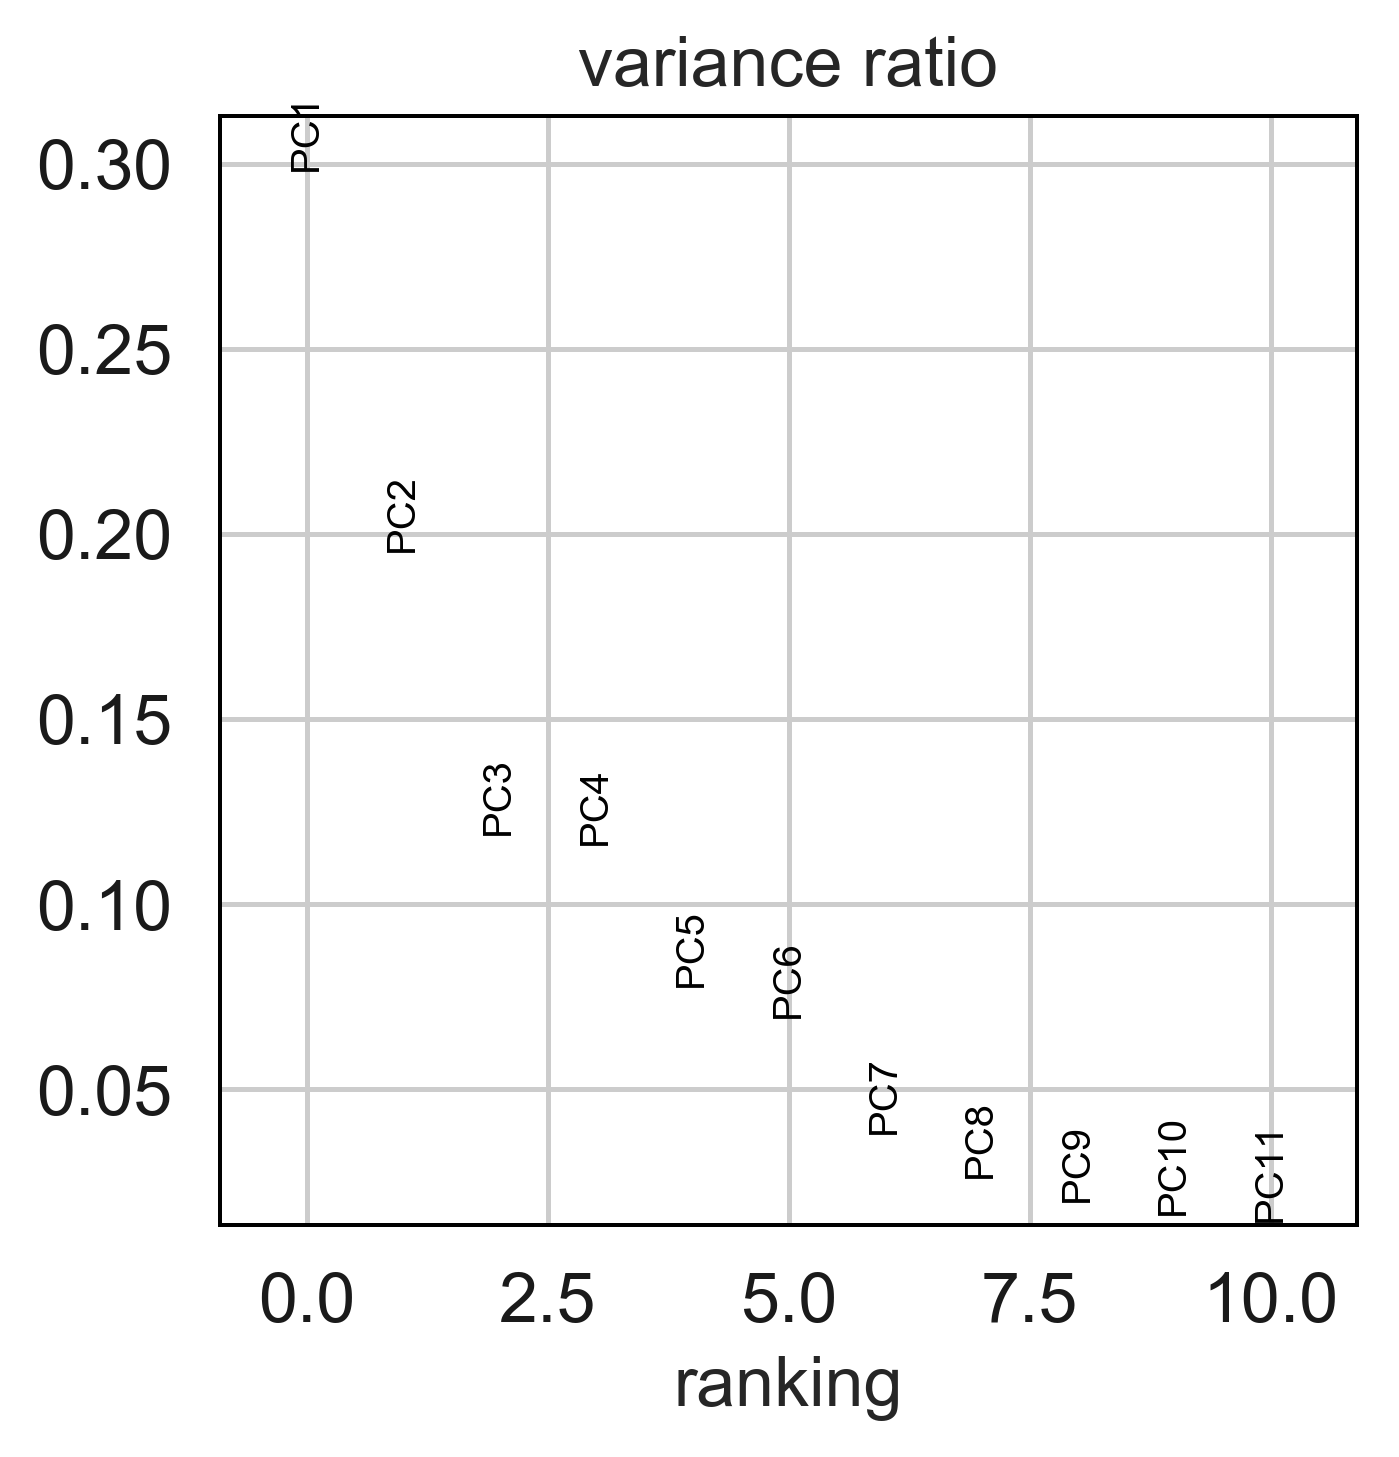

In [11]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata)

In [12]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=6)
sc.tl.umap(adata)

... storing 'core_ID' as categorical
... storing 'Disease' as categorical
... storing 'Patient' as categorical


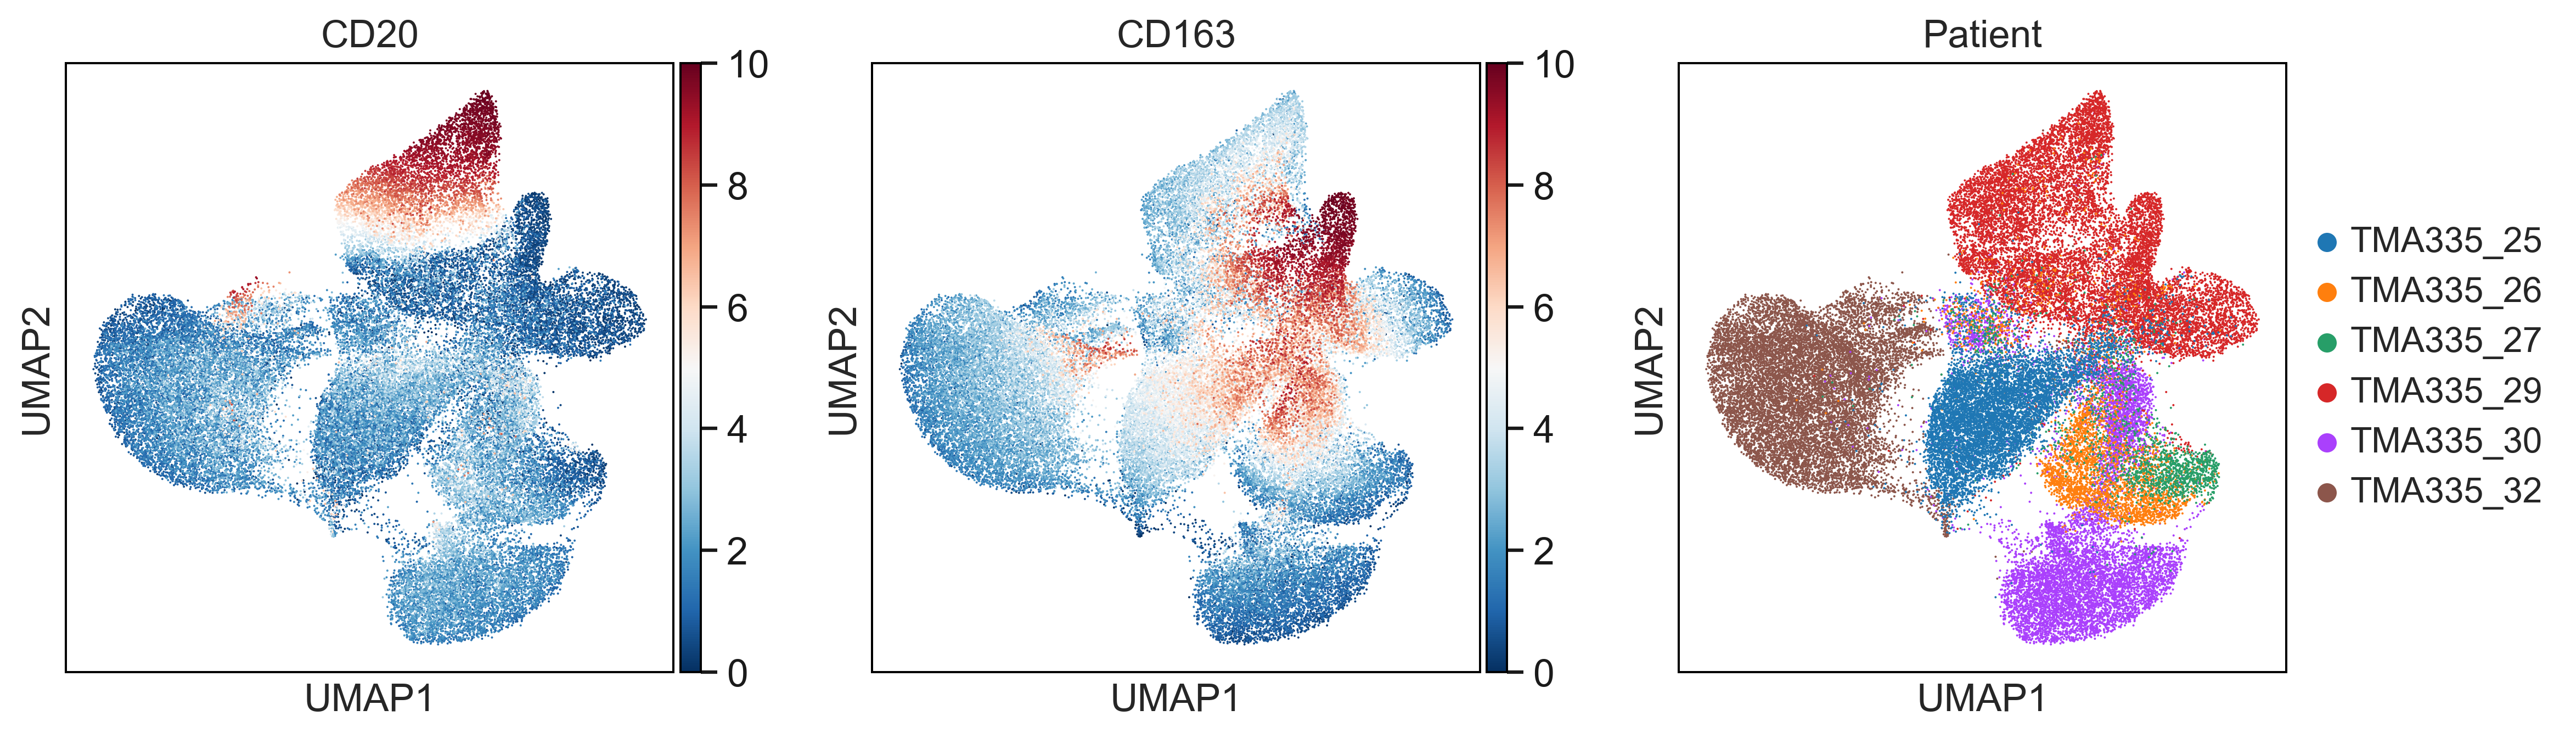

In [13]:
#sc.pl.umap(adata, color=['CD20', 'CD3D', 'leiden', 'patient'], color_map="RdBu_r", save = "_cluster_heatmap.pdf")
sc.pl.umap(adata, color=['CD20', 'CD163', 'Patient'], color_map="RdBu_r")